In [31]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [32]:
%config Completer.use_jedi = False #AutoCompletion

In [33]:
data = pd.read_csv("Data\marketing_campaign.csv", sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
print(len(data.columns))
data.columns

29


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
#datatime formatına çevirme
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['Dt_Customer'] =pd.to_datetime(data['Dt_Customer'])

In [37]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [38]:
print(data.shape)
print("After performing some transformations")
tran_data= data.copy()
tran_data = tran_data[tran_data['Income'].notnull()]

tran_data['Year'] = tran_data['Dt_Customer'].apply(lambda row:row.year)


tran_data['Children'] = tran_data['Kidhome']+ tran_data['Teenhome']
tran_data['Age'] = pd.Timestamp('now').year- tran_data['Year_Birth']

tran_data = tran_data.drop(['ID','Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Year', 'Year_Birth'], axis=1)

print(tran_data.shape)

(2240, 29)
After performing some transformations
(2216, 24)


In [39]:
tran_data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [40]:
#regrouping EDucaation as Fully Graduated and under_graduated
tran_data.Education = tran_data.Education.replace(['PhD','Graduation', 'Master'], 'fully_Graduated')

tran_data.Education = tran_data.Education.replace(['Basic', '2n Cycle'], 'under_Graduated')
tran_data['Education'].value_counts()

Education
fully_Graduated    1962
under_Graduated     254
Name: count, dtype: int64

In [41]:
tran_data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [42]:
tran_data.Marital_Status = tran_data.Marital_Status.replace(['Married','Together'], 'Partner')

tran_data.Marital_Status = tran_data.Marital_Status.replace(['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], 'Single')
tran_data['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

<Axes: >

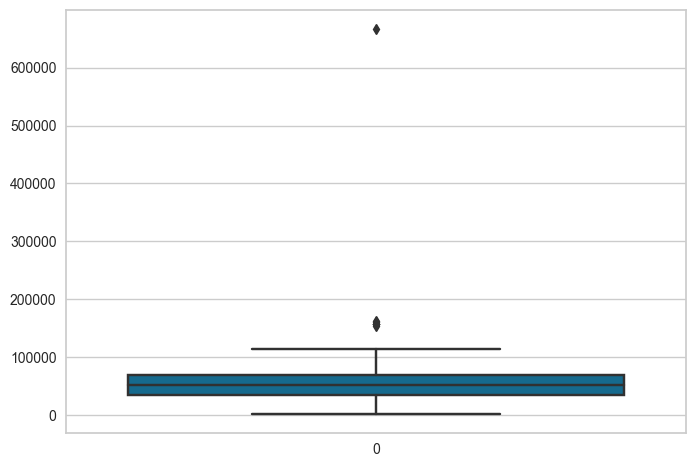

In [43]:
sns.boxplot(tran_data['Income'])

In [44]:
#removing Income >200000
tran_data=tran_data[tran_data['Income']<200000]
tran_data.shape

(2215, 24)

In [45]:
#Calling all the amount on commmodities as expense
cols = [i for i in tran_data.columns if str(i).startswith('Mnt')]
print(cols)
tran_data['Expense'] = tran_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
tran_data=tran_data.drop(cols, axis=1)
tran_data['Expense']

['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expense, Length: 2215, dtype: int64

In [46]:
#response to campaign in column
xgb_data = tran_data.copy()
cols_response= [i for i in tran_data.columns if str(i).startswith('Accept')]
cols_response= cols_response +['Response']
tran_data['Responses'] = tran_data[cols_response].sum(axis = 1)

# if there is any responses it would be 1 otherwise it would be 0
def mapp(num):
    if num >=1:
        result = 1
    else:
        result = 0
    return result


tran_data['Responses'] = tran_data['Responses'].apply(mapp)
tran_data= tran_data.drop(cols_response, axis=1)
tran_data['Responses'].value_counts()

Responses
0    1610
1     605
Name: count, dtype: int64

In [47]:
tran_data.head().T

,0,1,2,3,4
Education,fully_Graduated,fully_Graduated,fully_Graduated,fully_Graduated,fully_Graduated
Marital_Status,Single,Single,Partner,Partner,Partner
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Recency,58,38,26,26,94
NumDealsPurchases,3,2,1,2,5
NumWebPurchases,8,1,8,2,5
NumCatalogPurchases,10,1,2,0,3
NumStorePurchases,4,2,10,4,6
NumWebVisitsMonth,7,5,4,6,5
Complain,0,0,0,0,0


In [48]:
# Replacing the age with the age groups

def age_category(age):
    if  25<=age <= 35:
        age = 0
    elif 35 < age <= 45:
        age = 1
    elif 45 < age <= 55:
        age = 2
    elif 55 < age <= 65:
        age = 3
    elif 65 < age <= 75:
        age = 4
    elif age > 75:  
        age = 5
    return age  

tran_data.Age = tran_data.Age.apply(age_category)
tran_data.Age.unique()

xgb_data.Age = xgb_data.Age.apply(age_category)
xgb_data.Age.unique()

array([4, 3, 1, 2, 5, 0], dtype=int64)

In [49]:
#Dropping unwanted Columns 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
drop_cols= ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
tran_data.drop(drop_cols, axis = 1,inplace = True)
xgb_data.drop(drop_cols, axis = 1,inplace = True)

In [50]:
#scaling numerical and categorical data
cat_cols= tran_data.select_dtypes('object').columns 
print(cat_cols)
tran_data =pd.get_dummies(columns=cat_cols,data=tran_data)
xgb_data =pd.get_dummies(columns=cat_cols,data=xgb_data)

Index(['Education', 'Marital_Status'], dtype='object')


<Axes: >

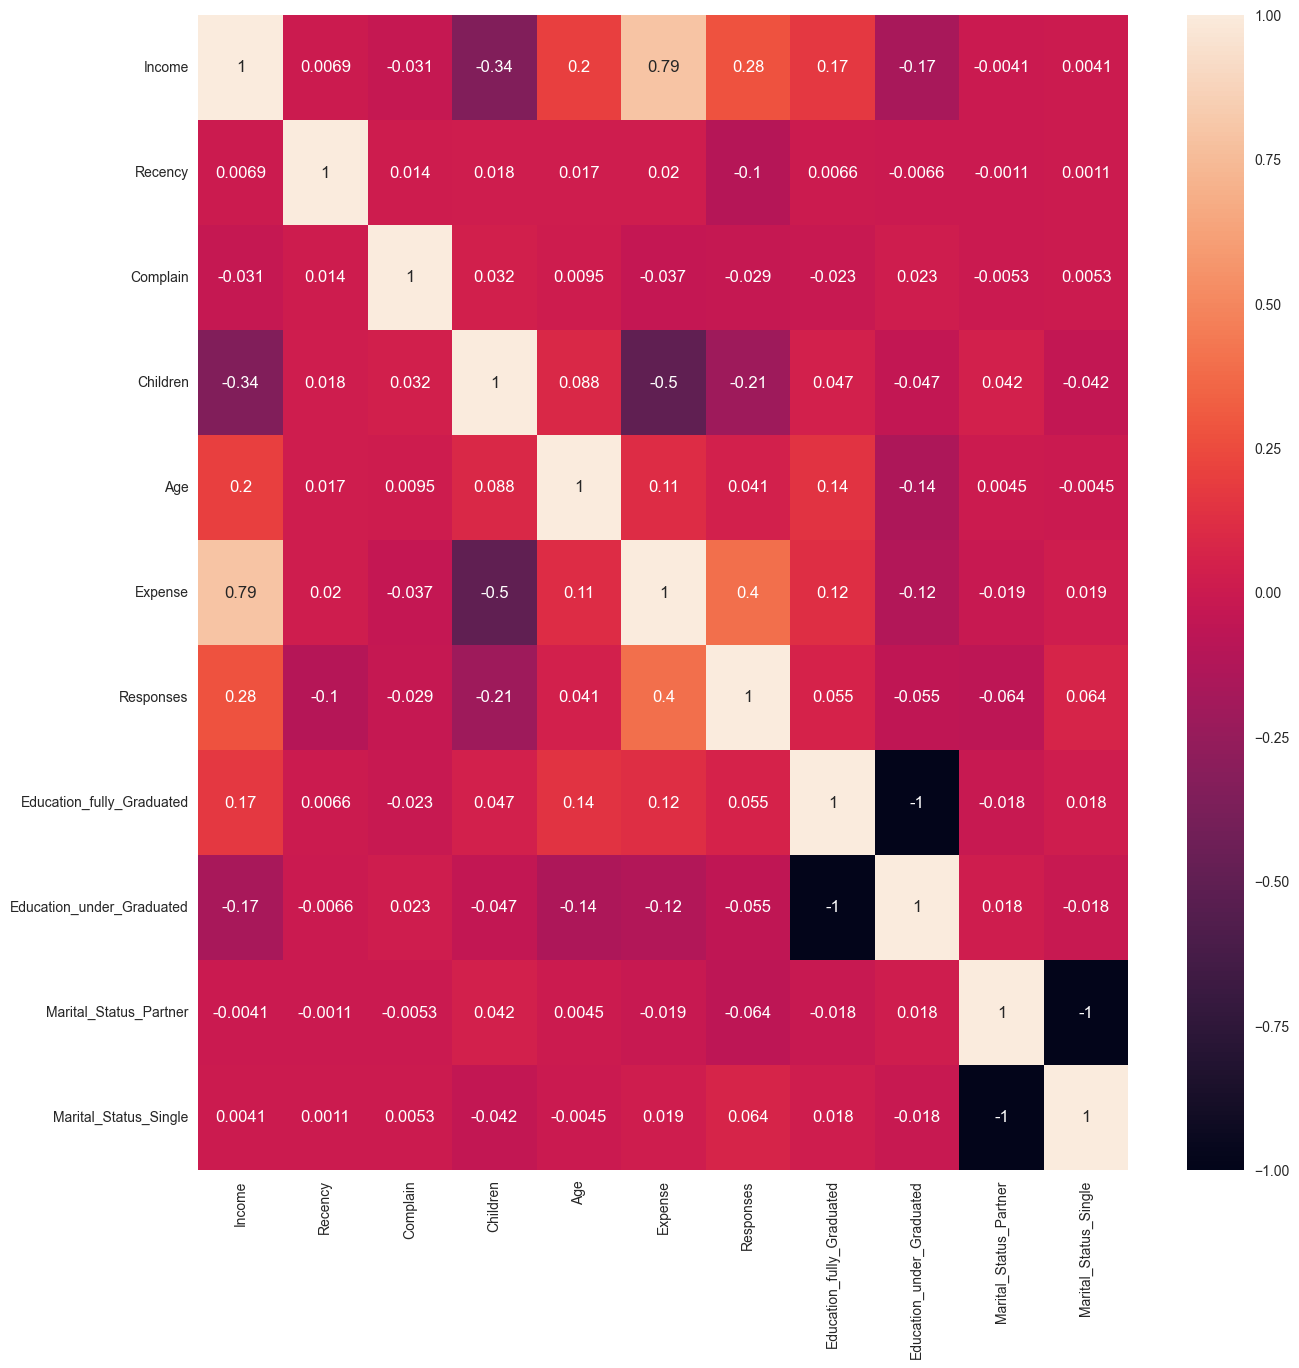

In [51]:
plt.figure(figsize= (15,15))
sns.heatmap(tran_data.corr(), annot=True)

In [52]:
tran_data.nunique()

Income                       1973
Recency                       100
Complain                        2
Children                        4
Age                             6
Expense                      1047
Responses                       2
Education_fully_Graduated       2
Education_under_Graduated       2
Marital_Status_Partner          2
Marital_Status_Single           2
dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
to_scale= ['Income', 'Recency', 'Expense']
X_Scaled =StandardScaler().fit_transform(tran_data[to_scale])
X_Scaled[:5,:]

array([[ 0.28660409,  0.31011292,  1.67501109],
       [-0.26140705, -0.38089872, -0.96272705],
       [ 0.91272331, -0.79550571,  0.2798301 ],
       [-1.17667951, -0.79550571, -0.91959423],
       [ 0.29380621,  1.55393388, -0.3074399 ]])

In [54]:
X_Scaled =pd.DataFrame(X_Scaled, columns =to_scale)
final_data = pd.concat((tran_data.drop(to_scale, axis=1), X_Scaled), axis=1)
final_data.head()

,Complain,Children,Age,Responses,Education_fully_Graduated,Education_under_Graduated,Marital_Status_Partner,Marital_Status_Single,Income,Recency,Expense
0,0.0,0.0,4.0,1.0,True,False,False,True,0.286604,0.310113,1.675011
1,0.0,2.0,4.0,0.0,True,False,False,True,-0.261407,-0.380899,-0.962727
2,0.0,0.0,3.0,0.0,True,False,True,False,0.912723,-0.795506,0.279830
3,0.0,1.0,1.0,0.0,True,False,True,False,-1.176680,-0.795506,-0.919594
4,0.0,1.0,1.0,0.0,True,False,True,False,0.293806,1.553934,-0.307440


In [55]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2215 non-null   float64
 1   Recency                    2215 non-null   int64  
 2   Complain                   2215 non-null   int64  
 3   Children                   2215 non-null   int64  
 4   Age                        2215 non-null   int64  
 5   Expense                    2215 non-null   int64  
 6   Responses                  2215 non-null   int64  
 7   Education_fully_Graduated  2215 non-null   bool   
 8   Education_under_Graduated  2215 non-null   bool   
 9   Marital_Status_Partner     2215 non-null   bool   
 10  Marital_Status_Single      2215 non-null   bool   
dtypes: bool(4), float64(1), int64(6)
memory usage: 211.6 KB


In [56]:
final_data.dropna(inplace=True)

In [57]:
features = ['Income', 'Age', 'Expense']

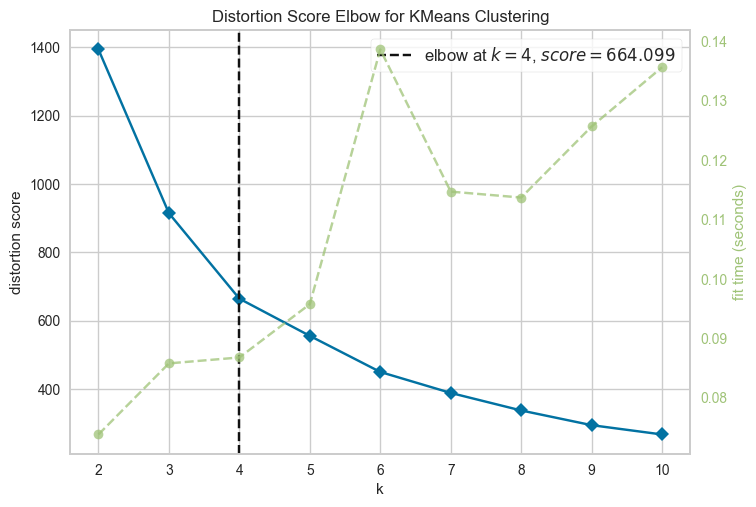

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = 10, random_state = 42)

visualizer.fit(final_data[['Income',  'Expense']])
visualizer.show()

In [59]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(final_data[['Income', 'Expense']])
preds = model.predict(final_data[['Income', 'Expense']])
dt_Kmeans = final_data[['Income','Expense']]
dt_Kmeans['Cluster'] = preds

Text(0.5, 1.0, 'PLot Showing Income distribution for different clusters')

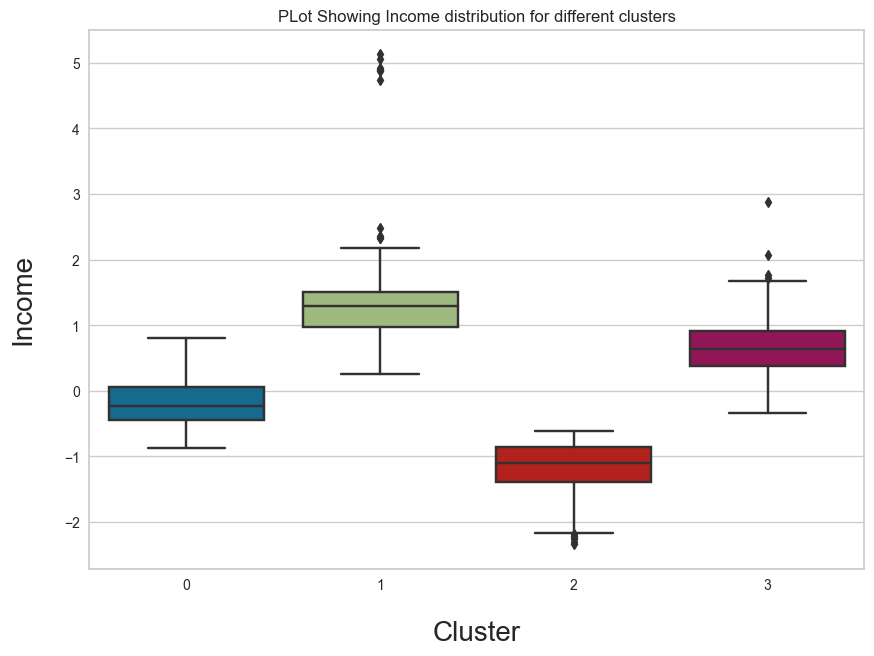

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dt_Kmeans, x='Cluster', y = 'Income')
plt.xlabel('Cluster', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)
plt.title("PLot Showing Income distribution for different clusters")

Text(0.5, 1.0, 'PLot Showing Expense distribution for different clusters')

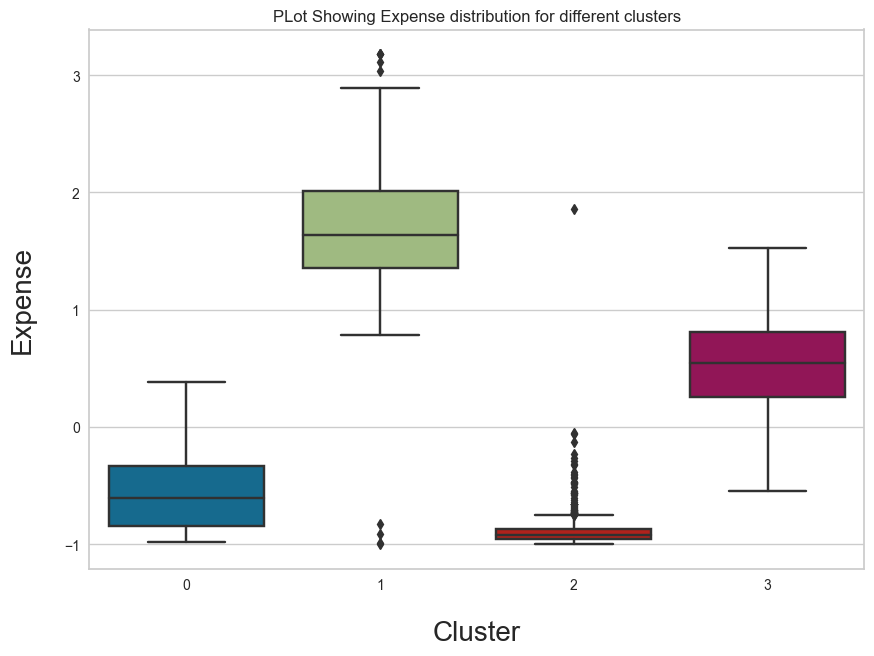

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dt_Kmeans, x='Cluster', y = 'Expense')
plt.xlabel('Cluster', fontsize=20, labelpad=20)
plt.ylabel('Expense', fontsize=20, labelpad=20)
plt.title("PLot Showing Expense distribution for different clusters")

Text(0, 0.5, 'Total Expense')

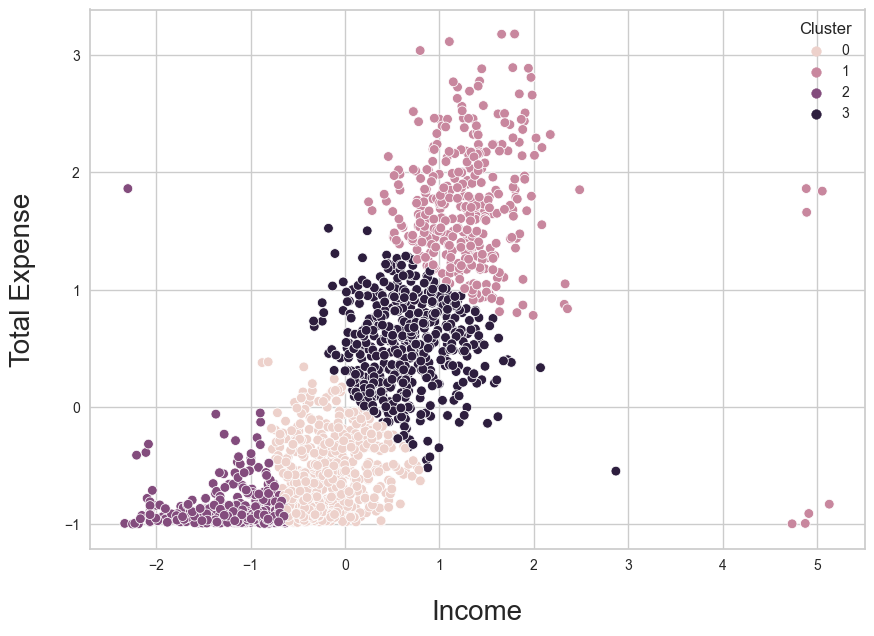

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dt_Kmeans, x='Income', y='Expense', hue='Cluster')
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Expense', fontsize=20, labelpad=20)

In [63]:
import xgboost as xgb

In [64]:
xgb_data.head()

,Income,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Expense,Education_fully_Graduated,Education_under_Graduated,Marital_Status_Partner,Marital_Status_Single
0,58138.0,58,0,0,0,0,0,0,1,0,4,1617,True,False,False,True
1,46344.0,38,0,0,0,0,0,0,0,2,4,27,True,False,False,True
2,71613.0,26,0,0,0,0,0,0,0,0,3,776,True,False,True,False
3,26646.0,26,0,0,0,0,0,0,0,1,1,53,True,False,True,False
4,58293.0,94,0,0,0,0,0,0,0,1,1,422,True,False,True,False


In [65]:
cat_cols= xgb_data.select_dtypes('object').columns 
xgb_data =pd.get_dummies(columns=cat_cols,data=xgb_data)

to_scale= ['Income', 'Recency', 'Expense']
X_Scaled =StandardScaler().fit_transform(xgb_data[to_scale])
X_Scaled[:5,:]

X_Scaled =pd.DataFrame(X_Scaled, columns =to_scale)
final_xgb_data = pd.concat((xgb_data.drop(to_scale, axis=1), X_Scaled), axis=1)
final_xgb_data.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Education_fully_Graduated,Education_under_Graduated,Marital_Status_Partner,Marital_Status_Single,Income,Recency,Expense
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,True,False,False,True,0.286604,0.310113,1.675011
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,True,False,False,True,-0.261407,-0.380899,-0.962727
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,True,False,True,False,0.912723,-0.795506,0.279830
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True,False,True,False,-1.176680,-0.795506,-0.919594
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True,False,True,False,0.293806,1.553934,-0.307440


In [66]:
final_xgb_data.dropna(inplace=True)

In [67]:
xi = final_xgb_data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)
yi = final_xgb_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

In [68]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score

In [69]:
xi = pd.get_dummies(xi, columns=['Education_fully_Graduated', 'Education_under_Graduated', 'Marital_Status_Partner', 'Marital_Status_Single'])


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xi, yi.iloc[:,0], test_size=0.2, random_state=7)
xgb_train = xgb.DMatrix(x_train, label=y_train)
xgb_test = xgb.DMatrix(x_test, label=y_test)


In [71]:
y1= yi.iloc[:,0]
y2= yi.iloc[:,1]
y3= yi.iloc[:,2]
y4= yi.iloc[:,3]
y5= yi.iloc[:,4]
y6= yi.iloc[:,5]
list_prom=[y1,y2,y3,y4,y5, y6]

In [72]:
import shap

shap_values_lis=[]
for i in range (0, len(list_prom)):
    params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
    }
    X_train, X_test, y_train, y_test = train_test_split(xi, list_prom[i], test_size=0.2, random_state=7)
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_test = xgb.DMatrix(X_test, label=y_test)
    model_train = xgb.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
    shap_values = shap.TreeExplainer(model_train).shap_values(xi)
    shap_values_lis.append(shap_values)

[0]	test-cox-nloglik:3.13550
[1000]	test-cox-nloglik:3.15977
[2000]	test-cox-nloglik:3.17726
[3000]	test-cox-nloglik:3.18613
[4000]	test-cox-nloglik:3.19215
[5000]	test-cox-nloglik:3.19785
[6000]	test-cox-nloglik:3.20245
[7000]	test-cox-nloglik:3.20672
[8000]	test-cox-nloglik:3.21054
[9000]	test-cox-nloglik:3.21351
[9999]	test-cox-nloglik:3.21686
[0]	test-cox-nloglik:2.30259
[1000]	test-cox-nloglik:2.32334
[2000]	test-cox-nloglik:2.33975
[3000]	test-cox-nloglik:2.34852
[4000]	test-cox-nloglik:2.35368
[5000]	test-cox-nloglik:2.35835
[6000]	test-cox-nloglik:2.36354
[7000]	test-cox-nloglik:2.36713
[8000]	test-cox-nloglik:2.36937
[9000]	test-cox-nloglik:2.37170
[9999]	test-cox-nloglik:2.37293
[0]	test-cox-nloglik:3.29584
[1000]	test-cox-nloglik:3.30837
[2000]	test-cox-nloglik:3.31711
[3000]	test-cox-nloglik:3.32004
[4000]	test-cox-nloglik:3.32411
[5000]	test-cox-nloglik:3.32667
[6000]	test-cox-nloglik:3.32879
[7000]	test-cox-nloglik:3.33050
[8000]	test-cox-nloglik:3.33257
[9000]	test-cox-n

Shap values for AcceptedCmp0 


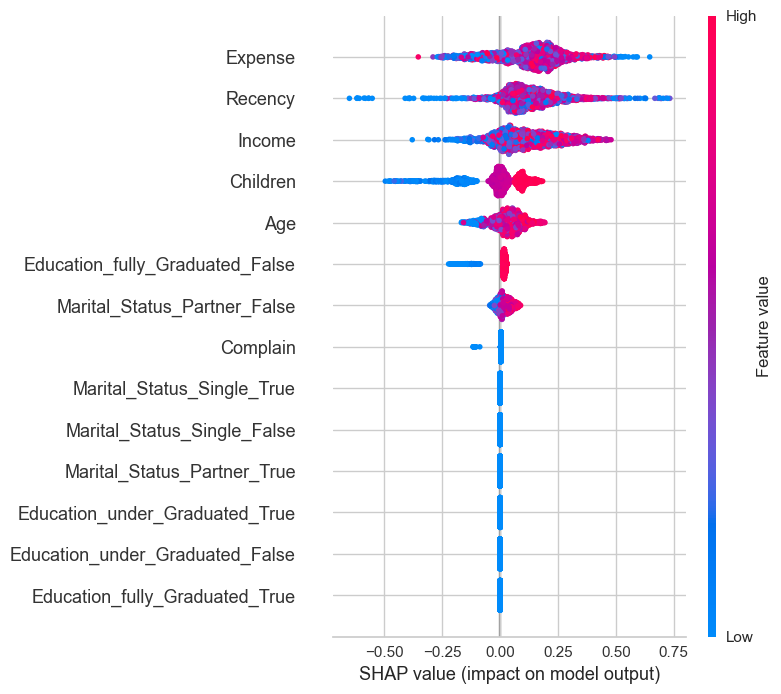

Shap values for AcceptedCmp1 


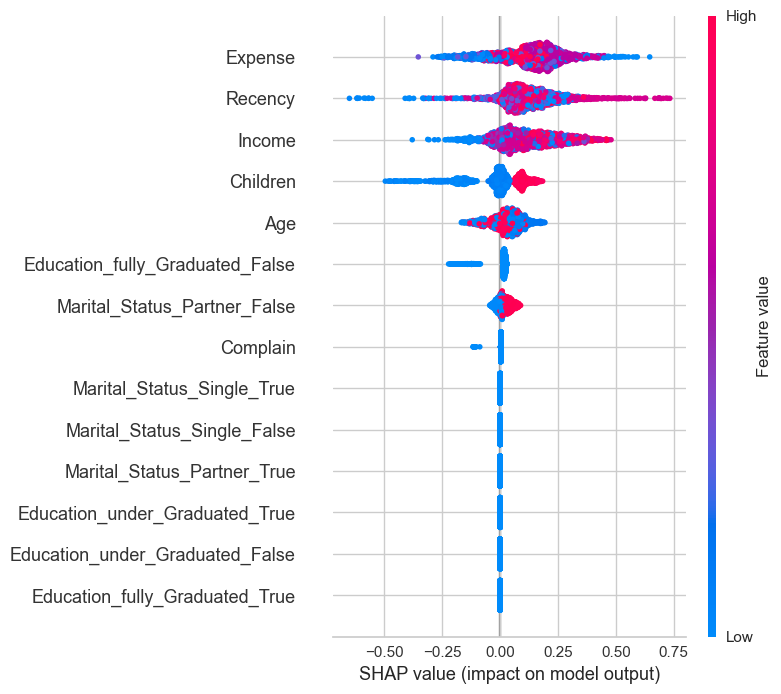

Shap values for AcceptedCmp2 


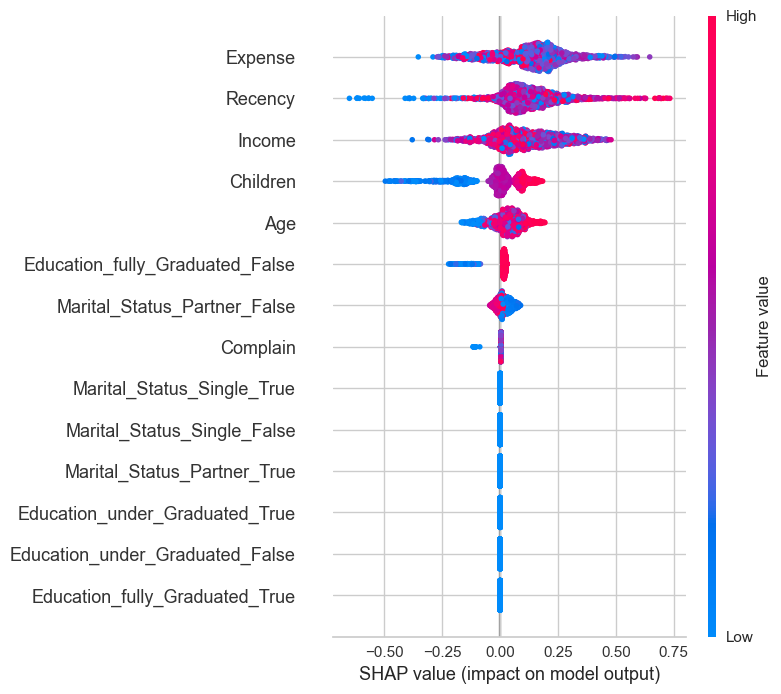

Shap values for AcceptedCmp3 


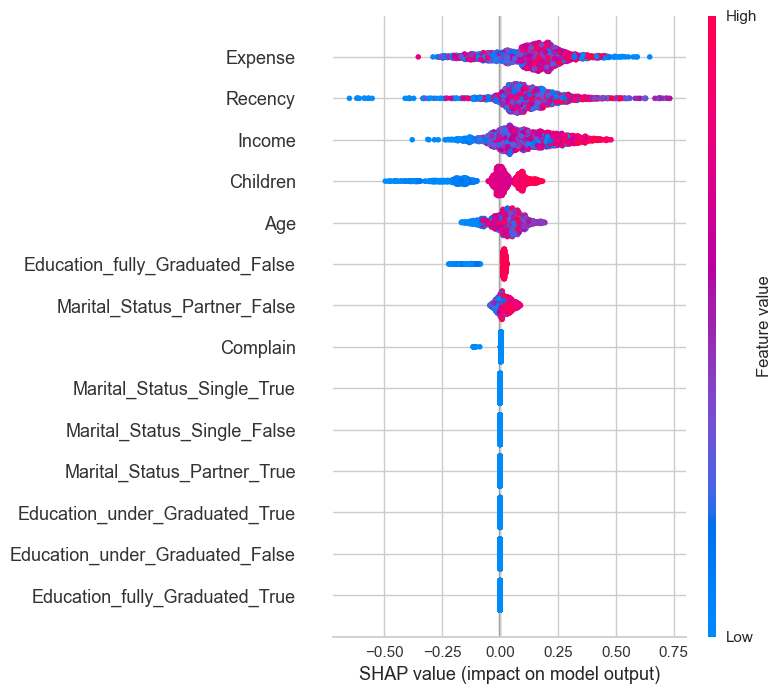

Shap values for AcceptedCmp4 


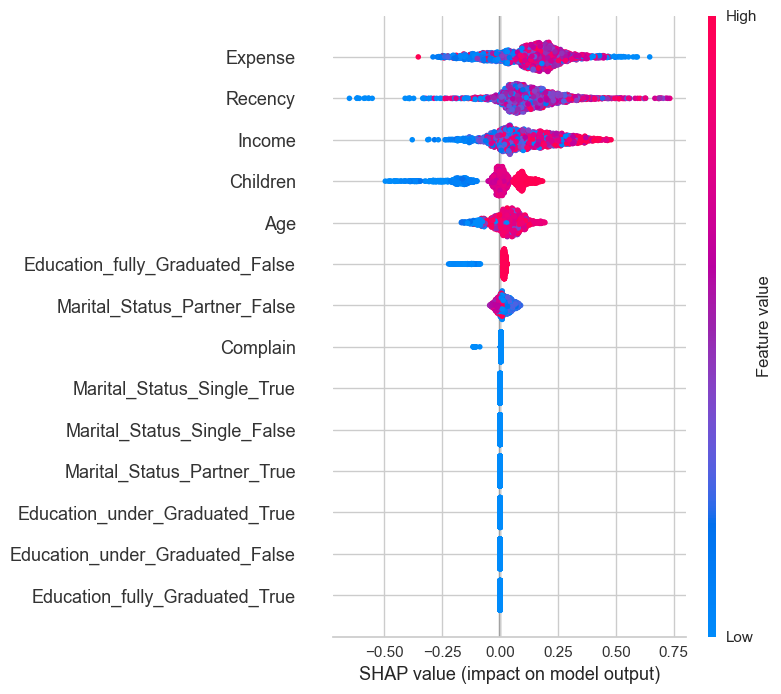

Shap values for AcceptedCmp5 


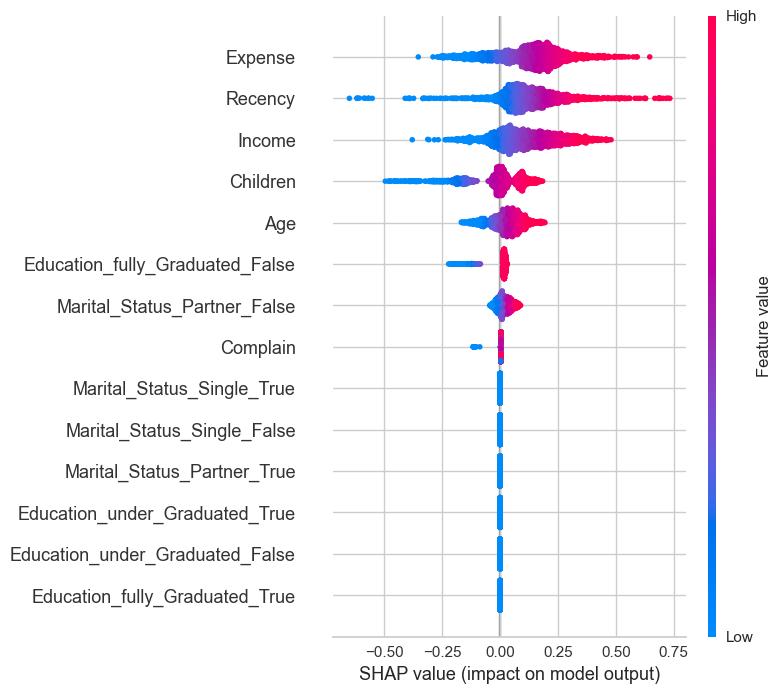

In [73]:
for i in range (0, len(shap_values_lis)):
    print("Shap values for AcceptedCmp{} ".format(i))
    shap.summary_plot(shap_values,shap_values_lis[i], feature_names=xi.columns)

In [75]:
from sklearn.metrics import f1_score

f1_scores = []

for i in range(len(list_prom)):
    X_train, X_test, y_train, y_test = train_test_split(xi, list_prom[i], test_size=0.2, random_state=7)
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_test = xgb.DMatrix(X_test, label=y_test)
    
    model_train = xgb.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
    
    y_pred = model_train.predict(xgb_test)
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    print(f"Model {i+1} F1-score: {f1:.4f}")



[0]	test-cox-nloglik:3.13550
[1000]	test-cox-nloglik:3.15977
[2000]	test-cox-nloglik:3.17726
[3000]	test-cox-nloglik:3.18613
[4000]	test-cox-nloglik:3.19215
[5000]	test-cox-nloglik:3.19785
[6000]	test-cox-nloglik:3.20245
[7000]	test-cox-nloglik:3.20672
[8000]	test-cox-nloglik:3.21054
[9000]	test-cox-nloglik:3.21351
[9999]	test-cox-nloglik:3.21686
Model 1 F1-score: 0.0996
[0]	test-cox-nloglik:2.30259
[1000]	test-cox-nloglik:2.32334
[2000]	test-cox-nloglik:2.33975
[3000]	test-cox-nloglik:2.34852
[4000]	test-cox-nloglik:2.35368
[5000]	test-cox-nloglik:2.35835
[6000]	test-cox-nloglik:2.36354
[7000]	test-cox-nloglik:2.36713
[8000]	test-cox-nloglik:2.36937
[9000]	test-cox-nloglik:2.37170
[9999]	test-cox-nloglik:2.37293
Model 2 F1-score: 0.0445
[0]	test-cox-nloglik:3.29584
[1000]	test-cox-nloglik:3.30837
[2000]	test-cox-nloglik:3.31711
[3000]	test-cox-nloglik:3.32004
[4000]	test-cox-nloglik:3.32411
[5000]	test-cox-nloglik:3.32667
[6000]	test-cox-nloglik:3.32879
[7000]	test-cox-nloglik:3.33050

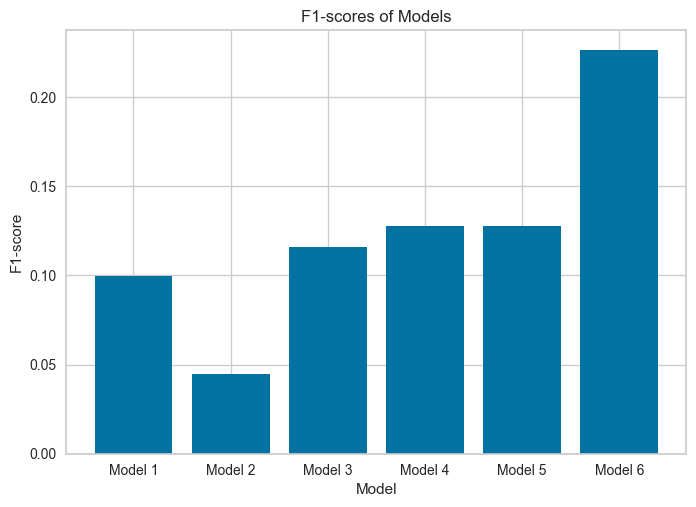

In [76]:
import matplotlib.pyplot as plt

# Generate a bar plot
plt.bar(range(1, len(f1_scores) + 1), f1_scores)

# Add a title and labels to the plot
plt.title("F1-scores of Models")
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.xticks(range(1, len(f1_scores) + 1), [f'Model {i+1}' for i in range(len(f1_scores))])

# Display the plot
plt.show()


[0]	test-cox-nloglik:3.13550
[1000]	test-cox-nloglik:3.15977
[2000]	test-cox-nloglik:3.17726
[3000]	test-cox-nloglik:3.18613
[4000]	test-cox-nloglik:3.19215
[5000]	test-cox-nloglik:3.19785
[6000]	test-cox-nloglik:3.20245
[7000]	test-cox-nloglik:3.20672
[8000]	test-cox-nloglik:3.21054
[9000]	test-cox-nloglik:3.21351
[9999]	test-cox-nloglik:3.21686
[0]	test-cox-nloglik:2.30259
[1000]	test-cox-nloglik:2.32334
[2000]	test-cox-nloglik:2.33975
[3000]	test-cox-nloglik:2.34852
[4000]	test-cox-nloglik:2.35368
[5000]	test-cox-nloglik:2.35835
[6000]	test-cox-nloglik:2.36354
[7000]	test-cox-nloglik:2.36713
[8000]	test-cox-nloglik:2.36937
[9000]	test-cox-nloglik:2.37170
[9999]	test-cox-nloglik:2.37293
[0]	test-cox-nloglik:3.29584
[1000]	test-cox-nloglik:3.30837
[2000]	test-cox-nloglik:3.31711
[3000]	test-cox-nloglik:3.32004
[4000]	test-cox-nloglik:3.32411
[5000]	test-cox-nloglik:3.32667
[6000]	test-cox-nloglik:3.32879
[7000]	test-cox-nloglik:3.33050
[8000]	test-cox-nloglik:3.33257
[9000]	test-cox-n

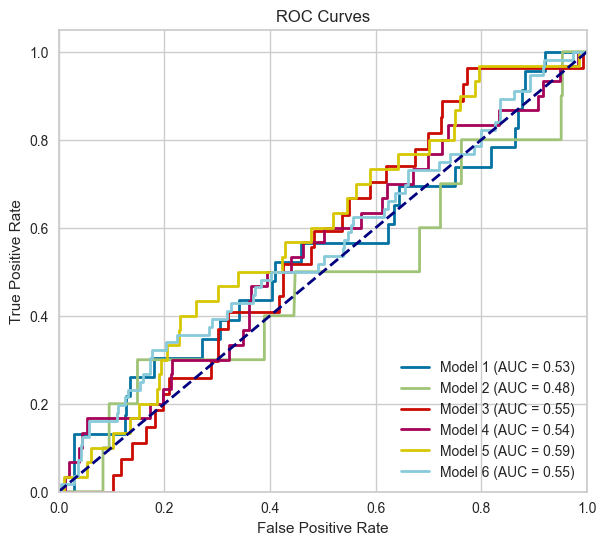

In [78]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

n_models = len(list_prom)
roc_aucs = []
pr_aucs = []

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for i in range(n_models):
    X_train, X_test, y_train, y_test = train_test_split(xi, list_prom[i], test_size=0.2, random_state=7)
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_test = xgb.DMatrix(X_test, label=y_test)
    
    model_train = xgb.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
    y_pred = model_train.predict(xgb_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=2, label=f'Model {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")